# Customer Churn Analysis

Step:
1. Data Pre-Processing
2. EDA
3. Modeling and Evaluation

## Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_retail.csv', sep=';')
data.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


Data Overview

In [3]:
# shape
data.shape

(100000, 8)

In [4]:
# missing value
data.isnull().sum()

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64

In [5]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [6]:
# stastistical description
data.describe()

,no,Row_Num,Customer_ID,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,50000.500000,50000.500000,193083.996940,1.492184e+12,1.509970e+12,1.373157e+06,11.698500
std,28867.657797,28867.657797,200747.292955,3.948432e+10,3.563295e+10,1.544435e+06,35.417324
min,1.000000,1.000000,654.000000,1.362729e+12,1.362729e+12,0.000000e+00,1.000000
25%,25000.750000,25000.750000,60994.500000,1.467106e+12,1.491482e+12,4.783038e+05,1.000000
50%,50000.500000,50000.500000,121441.000000,1.499012e+12,1.518611e+12,9.059370e+05,2.000000
75%,75000.250000,75000.250000,196023.000000,1.523675e+12,1.539695e+12,1.636372e+06,6.000000
max,100000.000000,100000.000000,846213.000000,1.549061e+12,1.549065e+12,4.881014e+07,3852.000000


Pre-Processing Actions

In [7]:
# change First_Transaction and Last_Transaction into datetime types
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s')
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s')

In [8]:
# drop column no and Row_Num
del data['no']
del data['Row_Num']

In [9]:
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


### Make column 'Churn' as a label. 
Churn customer is a customer which haven't make a transactions in the last 6 month. 

In [10]:
# Last Trasaction
print(max(data['Last_Transaction']))

2019-02-01 23:57:57.286000128


Last Transaction in 2019-02-01.
.
So the last 6 month is in 2018-08-01

In [11]:
# make churn column
data.loc[data['Last_Transaction'] <= '2018-08-01', 'Churn'] = 1
data.loc[data['Last_Transaction'] > '2018-08-01', 'Churn'] = 0

#### Note
- 1 = Churn
- 0 = Not Churn

In [12]:
# check Dataset
data['Churn'] = data['Churn'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   Churn                       100000 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(3), object(1)
memory usage: 5.0+ MB


In [13]:
data['Churn'].value_counts()

1    66569
0    33431
Name: Churn, dtype: int64

### Make Total Amount Column

In [14]:
# Total Amount Column
data['Total_Amount'] = data['Average_Transaction_Amount']*data['Count_Transaction']

### Encode Product Column into numeric 

In [15]:
# Product

data['Product'].value_counts()

Sepatu    49154
Jaket     34950
Tas       12484
Baju       3412
Name: Product, dtype: int64

In [16]:
encoded = pd.get_dummies(data['Product'])
encoded.head()

,Baju,Jaket,Sepatu,Tas
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0


In [17]:
data = data.join(encoded)
data.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn,Total_Amount,Baju,Jaket,Sepatu,Tas
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0,32288982,0,1,0,0
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0,52042817,0,0,1,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,9327450,0,0,0,1
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0,19511064,0,1,0,0
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0,44375900,0,0,1,0


## EDA

In [18]:
# Customer Acquisition by year
data['Year_First_Transaction'] = data['First_Transaction'].dt.year
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year

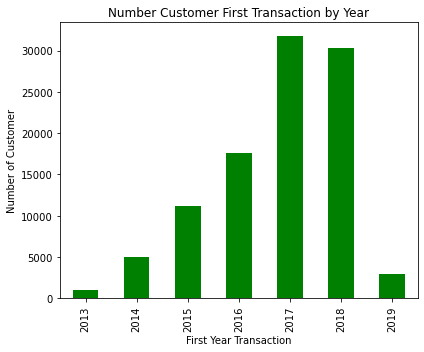

In [19]:
# make a plot

plt.figure(figsize=(6,5))
x = data.groupby('Year_First_Transaction')['Customer_ID'].count()
x.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', color='green')
plt.title('Number Customer First Transaction by Year')
plt.xlabel('First Year Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

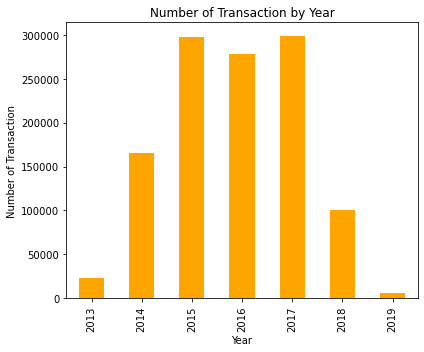

In [20]:
# Transaction by Year

plt.figure(figsize=(6,5))
tran = data.groupby('Year_First_Transaction')['Count_Transaction'].sum()
tran.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', color='orange')
plt.title('Number of Transaction by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

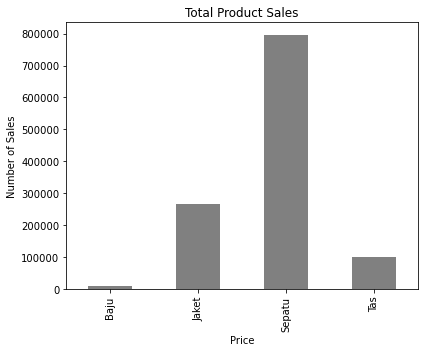

In [21]:
# Product Sale

plt.figure(figsize=(6,5))
sale = data.groupby('Product')['Count_Transaction'].sum()
sale.plot(x='Product', y='Count_Transaction', kind='bar', color='grey')
plt.title('Total Product Sales')
plt.xlabel('Price')
plt.ylabel('Number of Sales')
plt.tight_layout()
plt.show()

## Modeling and Evaluation

In [22]:
# Make year_diff
data['Year_Diff'] = data['Year_Last_Transaction'] - data['Year_First_Transaction']

# Feature Selection
X = data[['Year_Diff', 'Average_Transaction_Amount', 'Count_Transaction', 'Total_Amount', 'Baju', 'Jaket', 'Sepatu', 'Tas']]
y = data['Churn']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
X_train.head()

,Year_Diff,Average_Transaction_Amount,Count_Transaction,Total_Amount,Baju,Jaket,Sepatu,Tas
98980,0,902451,1,902451,0,1,0,0
69824,0,865581,6,5193486,1,0,0,0
9928,1,3807365,60,228441900,0,0,1,0
75599,0,317348,1,317348,1,0,0,0
95621,0,618458,1,618458,0,0,1,0


In [26]:
# Modeling

LR = LogisticRegression()
LR.fit(X_train, y_train)
predict = LR.predict(X_test)

In [27]:
print(confusion_matrix(y_test, predict))

[[ 3778  4621]
 [ 1181 15420]]


## Using Decision Tree Classifier

In [28]:
!pip install imbalanced-learn

In [29]:
!pip install delayed

In [30]:
# import model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [31]:
# define step in pipeline
model = DecisionTreeClassifier(min_samples_split=3,
                              min_samples_leaf=2)
over = SMOTE()
under = RandomUnderSampler()
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [32]:
# ROC AUC
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.644


In [33]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier(min_samples_split=3,
                                   min_samples_leaf=2)
    over = SMOTE(k_neighbors=k)
    under = RandomUnderSampler()
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)

    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = scores.mean()
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))


> k=1, Mean ROC AUC: 0.644
> k=2, Mean ROC AUC: 0.645
> k=3, Mean ROC AUC: 0.644
> k=4, Mean ROC AUC: 0.644
> k=5, Mean ROC AUC: 0.644
> k=6, Mean ROC AUC: 0.644
> k=7, Mean ROC AUC: 0.644


## Selected Model

In [35]:
# using k=2

oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(X, y)

# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modeling
clf = DecisionTreeClassifier(min_samples_split=4,
                                min_samples_leaf=3)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

# accuracy score
print('Accuracy Score = \n', accuracy_score(y_test, predict))
print('Confusion Matrix = \n', confusion_matrix(y_test, predict))

Accuracy Score = 
 0.7421761554253667
Confusion Matrix = 
 [[15098  4900]
 [ 5398 14546]]
